<font size="+3" color=purple ><b> <center><u>EDA on House Prices with python</u></center></b></font>
 


<font size="+2" color=green ><b>Please Upvote my kernel if you like my work.</b></font>

**Developing a prediction model for house prices is much needed for socio-economic development and national lives. In this notebook, a diverse set of machine learning algorithms such as Decision Tree, Random Forest, XgBoost, Lasso etc. are being employed to predict the housing price. The main aim of this work is to predict a house price for the given features to maximize the prediction accuracy by using the proposed methodology.**

<font size="+1" color=blue ><b>Visualization tools.</b></font>
* Matplotlib
* Seaborn
* Yellowbrick
* Plotly

<font size="+1" color=brown ><b>ML Algorithms.</b></font>
* Xgboost
* Lasso
* RandomForest
* DecisionTree
* Ridge

In [37]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import average_precision_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_recall_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.svm import SVC
import warnings 
warnings.filterwarnings("ignore")

In [38]:
df=pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')
dt=pd.read_csv('../input/house-prices-advanced-regression-techniques/test.csv')
df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


We have 1460 observations of 80 variables in the training dataframe. The variables are described below:

SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.

* MSSubClass: The building class
* MSZoning: The general zoning classification
* LotFrontage: Linear feet of street connected to property
* LotArea: Lot size in square feet
* Street: Type of road access
* Alley: Type of alley access
* LotShape: General shape of property
* LandContour: Flatness of the property
* Utilities: Type of utilities available
* LotConfig: Lot configuration
* LandSlope: Slope of property
* Neighborhood: Physical locations within Ames city limits
* Condition1: Proximity to main road or railroad
* Condition2: Proximity to main road or railroad (if a second is present)
* BldgType: Type of dwelling
* HouseStyle: Style of dwelling
* OverallQual: Overall material and finish quality
* OverallCond: Overall condition rating
* YearBuilt: Original construction date
* YearRemodAdd: Remodel date
* RoofStyle: Type of roof
* RoofMatl: Roof material
* Exterior1st: Exterior covering on house
* Exterior2nd: Exterior covering on house (if more than one material)
* MasVnrType: Masonry veneer type
* MasVnrArea: Masonry veneer area in square feet
* ExterQual: Exterior material quality
* ExterCond: Present condition of the material on the exterior
* Foundation: Type of foundation
* BsmtQual: Height of the basement
* BsmtCond: General condition of the basement
* BsmtExposure: Walkout or garden level basement walls
* BsmtFinType1: Quality of basement finished area
* BsmtFinSF1: Type 1 finished square feet
* BsmtFinType2: Quality of second finished area (if present)
* BsmtFinSF2: Type 2 finished square feet
* BsmtUnfSF: Unfinished square feet of basement area
* TotalBsmtSF: Total square feet of basement area
* Heating: Type of heating
* HeatingQC: Heating quality and condition
* CentralAir: Central air conditioning
* Electrical: Electrical system
* 1stFlrSF: First Floor square feet
* 2ndFlrSF: Second floor square feet
* LowQualFinSF: Low quality finished square feet (all floors)
* GrLivArea: Above grade (ground) living area square feet
* BsmtFullBath: Basement full bathrooms
* BsmtHalfBath: Basement half bathrooms
* FullBath: Full bathrooms above grade
* HalfBath: Half baths above grade
* Bedroom: Number of bedrooms above basement level
* Kitchen: Number of kitchens
* KitchenQual: Kitchen quality
* TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
* Functional: Home functionality rating Fireplaces: Number of fireplaces
* FireplaceQu: Fireplace quality
* GarageType: Garage location
* GarageYrBlt: Year garage was built
* GarageFinish: Interior finish of the garage
* GarageCars: Size of garage in car capacity
* GarageArea: Size of garage in square feet
* GarageQual: Garage quality
* GarageCond: Garage condition
* PavedDrive: Paved driveway
* WoodDeckSF: Wood deck area in square feet
* OpenPorchSF: Open porch area in square feet
* EnclosedPorch: Enclosed porch area in square feet
* 3SsnPorch: Three season porch area in square feet
* ScreenPorch: Screen porch area in square feet
* PoolArea: Pool area in square feet
* PoolQC: Pool quality
* Fence: Fence quality
* MiscFeature: Miscellaneous feature not covered in other categories
* MiscVal: $Value of miscellaneous feature
* MoSold: Month Sold
* YrSold: Year Sold
* SaleType: Type of sale
* SaleCondition: Condition of sale


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

**Univariate analysis**

In [40]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [41]:
categorical_features = df.select_dtypes(include=['object']).columns
print('Categorical')
print(categorical_features)
print('Numerical')
numerical_features = df.select_dtypes(exclude = ["object"]).columns
print(numerical_features)
df_num=df[numerical_features]
df_cat=df[categorical_features]

Categorical
Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')
Numerical
Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfB

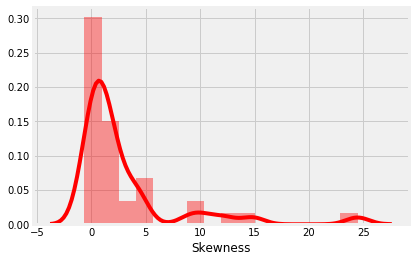

In [42]:
sns.distplot(df.skew(),color='red',axlabel ='Skewness')

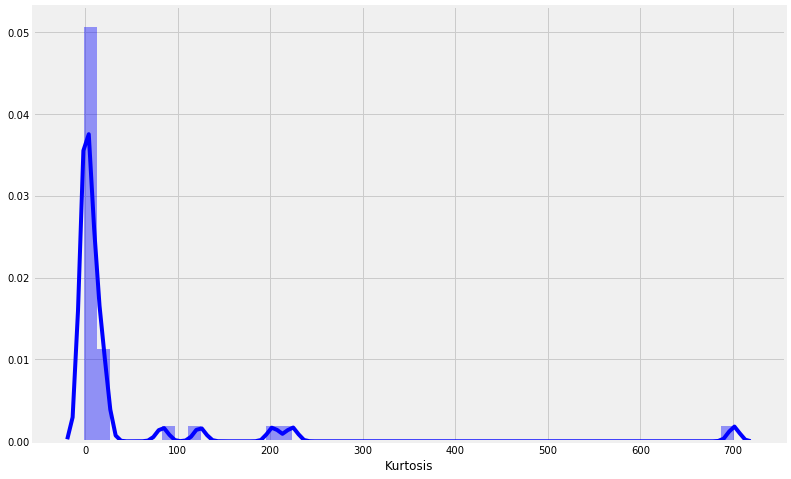

In [43]:
plt.figure(figsize = (12,8))
sns.distplot(df.kurt(),color='blue',axlabel ='Kurtosis',norm_hist= False, kde = True,rug = False)
plt.show()

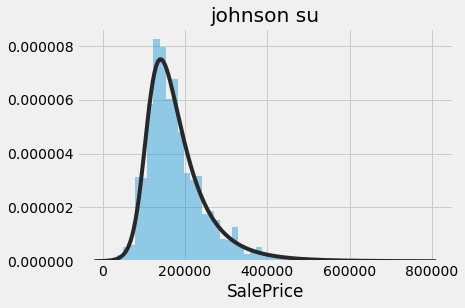

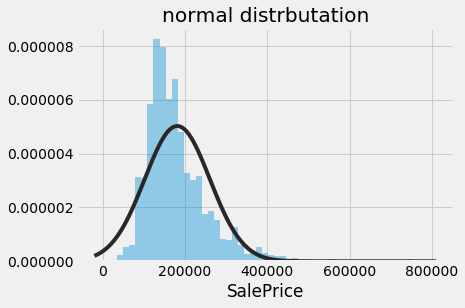

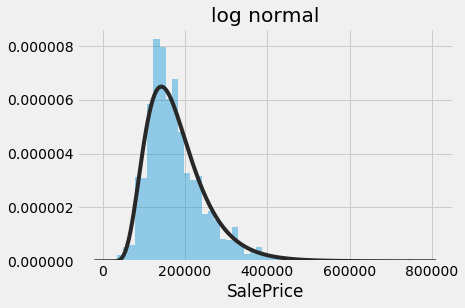

In [44]:
%matplotlib inline
import scipy.stats as st
y=df['SalePrice']
plt.style.use('fivethirtyeight')
plt.figure(1);
plt.title('johnson su')
sns.distplot(y,kde=False,fit=st.johnsonsu)
plt.figure(2);
plt.title('normal distrbutation')
sns.distplot(y,kde=False,fit=st.norm)
plt.figure(3);
plt.title('log normal')
sns.distplot(y,kde=False,fit=st.lognorm)

With this information we can see that the prices are skewed right and some outliers lies above ~500,000.

It is apparent that SalePrice doesn't follow normal distribution, so before performing regression it has to be transformed. While log transformation does pretty good job, best fit is unbounded Johnson distribution.

**Bivariate analysis**

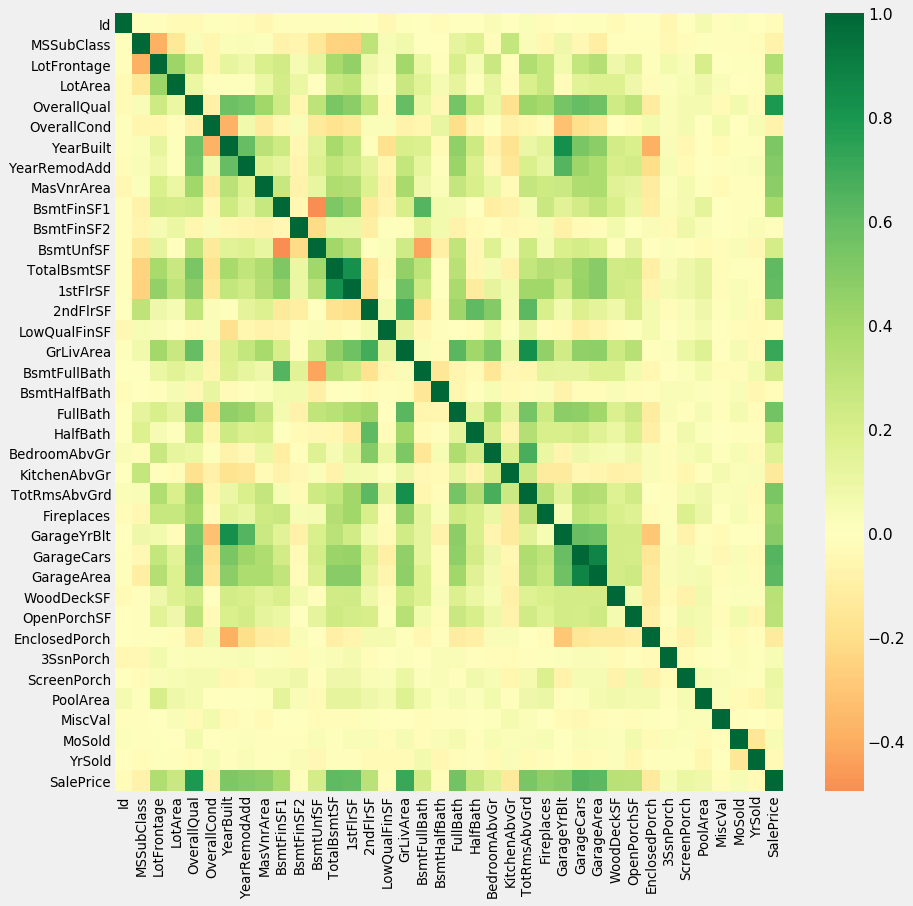

In [45]:
import seaborn as sns
plt.figure(figsize=(12,12), dpi= 80)
sns.heatmap(df.corr(), cmap='RdYlGn', center=0)

# Decorations
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [46]:
df_corr=df.corr()['SalePrice'][:-1]
feature_list=df_corr[abs(df_corr)>0.5].sort_values(ascending=False)
feature_list

OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64

There is 10 strongly correlated values with SalePrice, now we have strongly correlated values but this is incomplete without removing outliers.

### The relationship between these discrete features and Sale Price

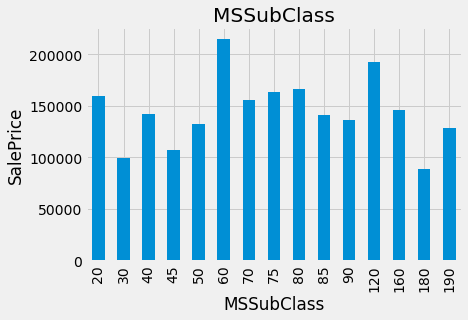

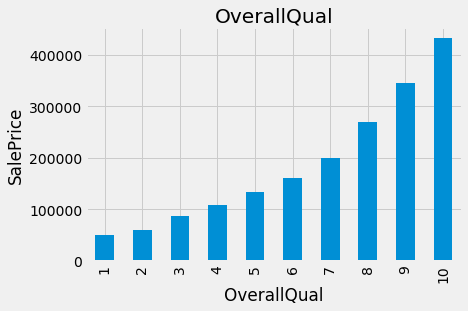

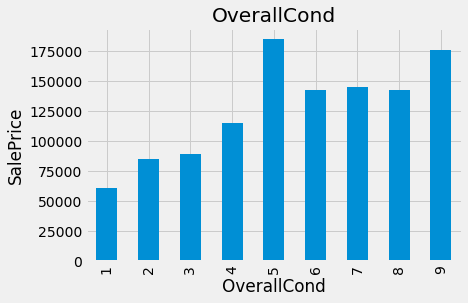

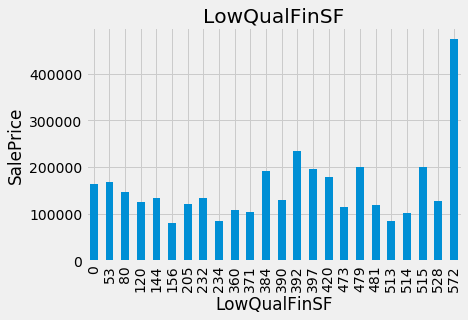

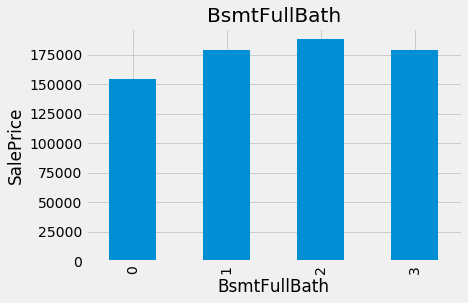

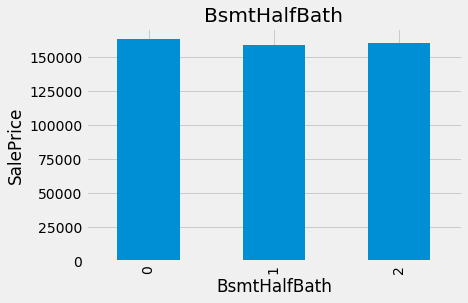

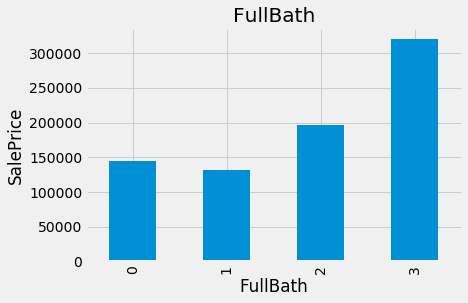

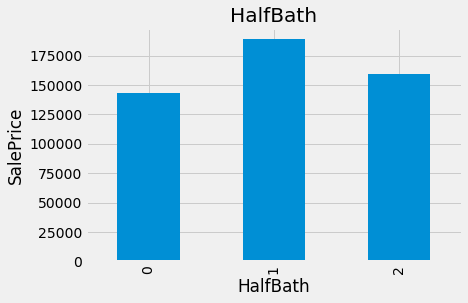

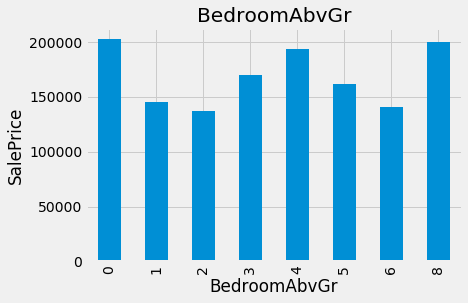

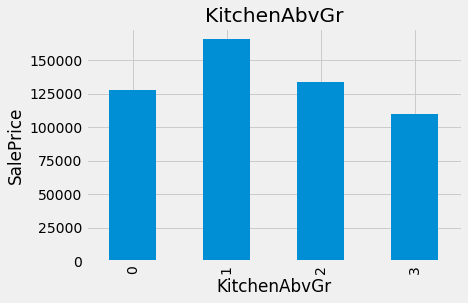

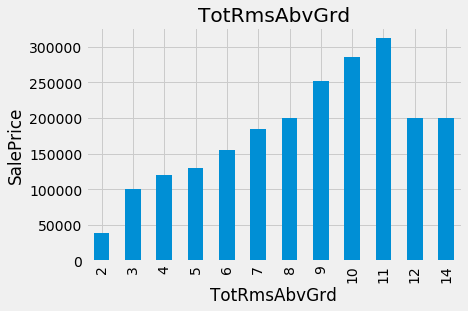

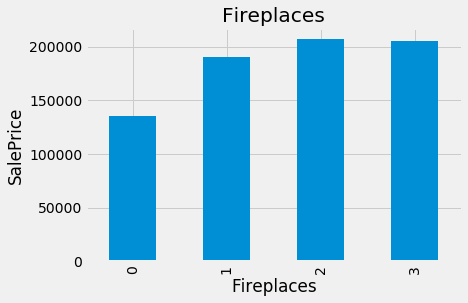

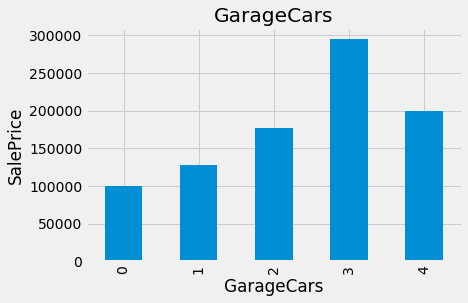

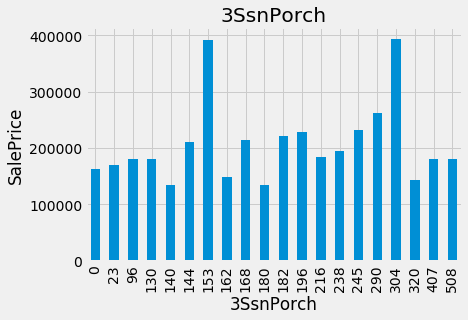

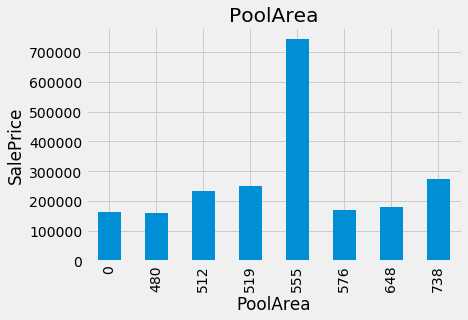

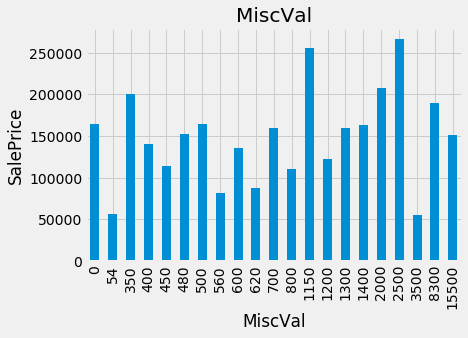

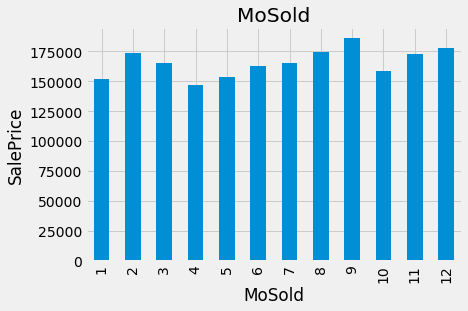

In [47]:
year_feature = [feature for feature in df_num if 'Yr' in feature or 'Year' in feature]
discrete_feature=[feature for feature in df_num if len(df[feature].unique())<25 and feature not in year_feature+['Id']]
for feature in discrete_feature:
    data=df.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

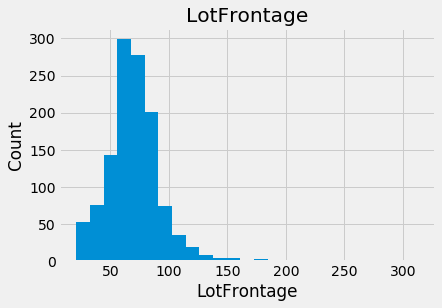

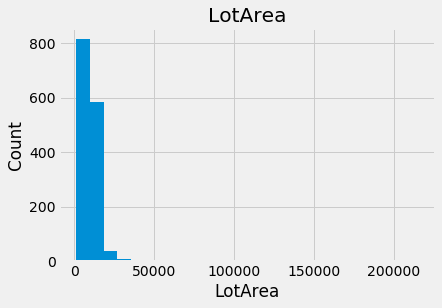

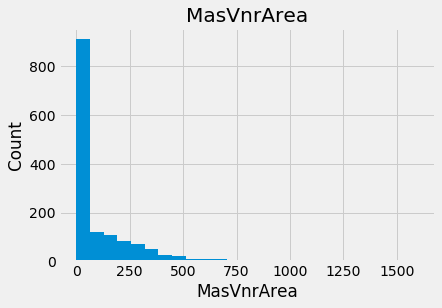

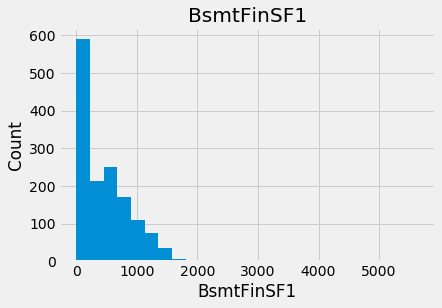

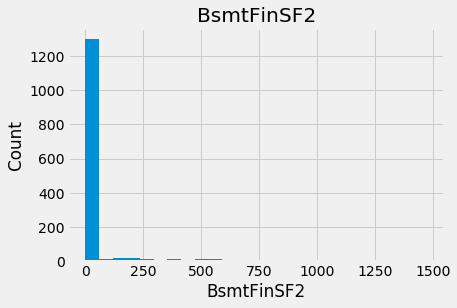

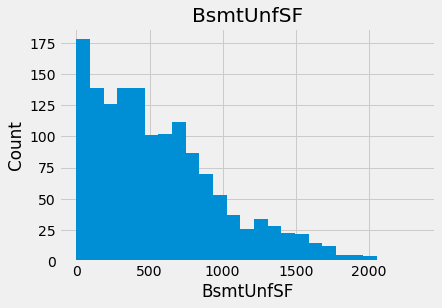

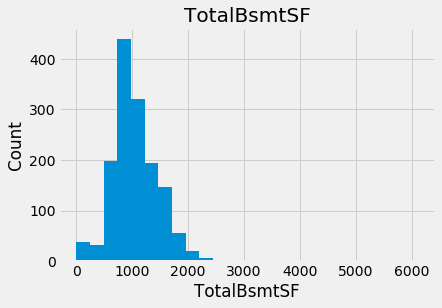

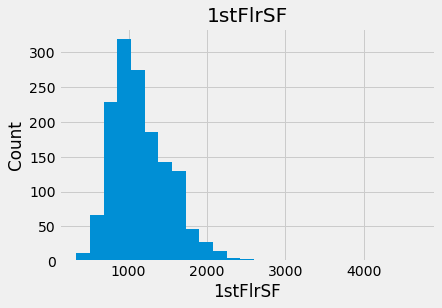

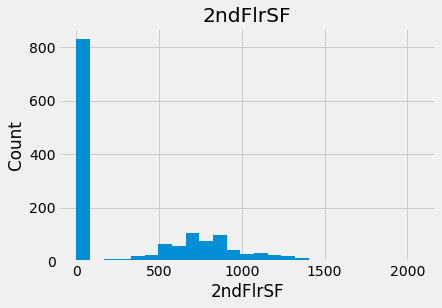

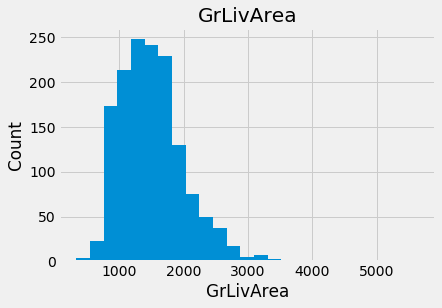

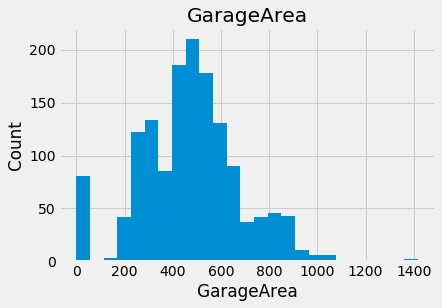

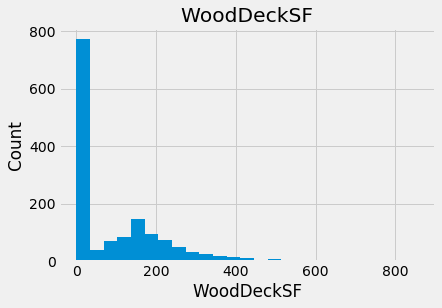

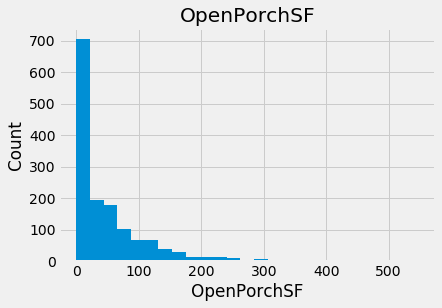

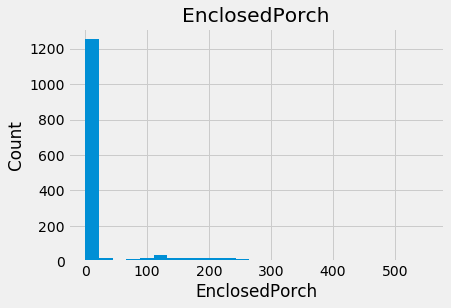

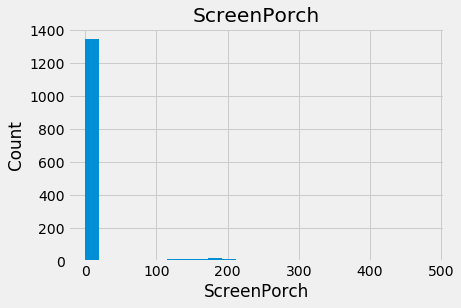

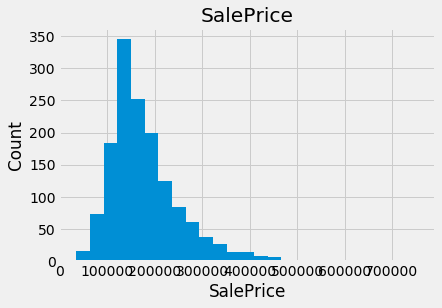

In [48]:
continuous_feature=[feature for feature in df_num if feature not in discrete_feature+year_feature+['Id']]
for feature in continuous_feature:
    data=df.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

In [49]:
dy=pd.DataFrame(df.groupby('YrSold')['SalePrice'].mean().reset_index().values,
                    columns=["YrSold","SalePrice"])
fig = go.Figure(layout={'title':"Average SalePrice over the Year Sold",'xaxis':{'title':"Year Sold"}
                        ,'yaxis':{'title':"Average SalePrice"}})
# Add traces
fig.add_trace(go.Bar(x=dy.YrSold, y=dy.SalePrice,marker=dict(color="blue")))
fig.show()

In [50]:
dy=pd.DataFrame(df.groupby('MoSold')['SalePrice'].mean().reset_index().values,
                    columns=["MoSold","SalePrice"])
fig = go.Figure(layout={'title':"Average SalePrice over the Month Sold",'xaxis':{'title':"Month Sold"}
                        ,'yaxis':{'title':"Average SalePrice"}})
# Add traces
fig.add_trace(go.Scatter(x=dy.MoSold, y=dy.SalePrice))
fig.show()

In [51]:
dy=pd.DataFrame(df.groupby('SaleType')['SalePrice'].mean().reset_index().values,
                    columns=["SaleType","SalePrice"])
fig = go.Figure(layout={'title':"Average SalePrice with Respect to SaleType",'xaxis':{'title':"Sale Type"}
                        ,'yaxis':{'title':"Average SalePrice"}})

# Add traces
fig.add_trace(go.Bar(x=dy.SaleType, y=dy.SalePrice,marker=dict(color="brown")))
fig.show()

In [52]:
dy=pd.DataFrame(df.groupby('YearBuilt')['SalePrice'].mean().reset_index().values,
                    columns=["YearBuilt","SalePrice"])
fig = go.Figure(layout={'title':"Average SalePrice with Respect to Year Built",'xaxis':{'title':"Year Built"}
                        ,'yaxis':{'title':"Average SalePrice"}})

# Add traces
fig.add_trace(go.Scatter(x=dy.YearBuilt, y=dy.SalePrice,mode='lines+markers',marker=dict(color="red")))
fig.show()

In [53]:
dy=pd.DataFrame(df.groupby('Neighborhood')['SalePrice'].mean().reset_index().values,
                    columns=["Neighborhood","SalePrice"])
fig = go.Figure(layout={'title':"Average SalePrice over the Neighborhood",'xaxis':{'title':"Neighborhood"}
                        ,'yaxis':{'title':"Average SalePrice"},'xaxis_tickangle':-45})
# Add traces
fig.add_trace(go.Scatter(x=dy.Neighborhood, y=dy.SalePrice,mode='lines+markers'))
fig.show()

In [54]:
dy=pd.DataFrame(df.groupby('HouseStyle')['SalePrice'].mean().reset_index().values,
                    columns=["HouseStyle","SalePrice"])
fig = go.Figure(layout={'title':"Average SalePrice with Respect to House Style",'xaxis':{'title':"House Style"}
                        ,'yaxis':{'title':"Average SalePrice"}})

# Add traces
fig.add_trace(go.Bar(x=dy.HouseStyle, y=dy.SalePrice,marker=dict(color="green")))
fig.show()

In [55]:
dy=pd.DataFrame(df.groupby('SaleCondition')['SalePrice'].mean().reset_index().values,
                    columns=["SaleCondition","SalePrice"])
fig = go.Figure(layout={'title':"Average SalePrice with Respect to SaleType",'xaxis':{'title':"Sale Condition"}
                        ,'yaxis':{'title':"Average SalePrice"}})

# Add traces
fig.add_trace(go.Bar(x=dy.SaleCondition, y=dy.SalePrice,marker=dict(color="black")))
fig.show()

In [56]:
df['saletype'] = 'Low Range'
df.loc[(df['SalePrice'] >= 143000) & (df['SalePrice'] <= 254000), 'saletype'] = 'Medium Range'
df.loc[(df['SalePrice'] > 254000), 'saletype'] = 'High Range'

df_flight = pd.DataFrame(df['saletype'].value_counts().reset_index().values, columns=["saletype", "AggregateType"])
labels = ["Low Range","Medium Range","High Range"]
value = [df_flight['AggregateType'][0],df_flight['AggregateType'][1],df_flight['AggregateType'][2]]
# colors=['lightcyan','cyan','royalblue']
figs = go.Figure(data=[go.Pie(labels=labels, values=value, pull=[0, 0, 0.2],textinfo = 'label+percent', hole = 0.35, 
                              hoverinfo="label+percent")],layout={'title':"SalePrice by Range",
                                                'annotations':[dict(text='<b>Saleprice<b>', x=0.5, y=0.5, font_size=11, showarrow=False)]})
figs.update_traces( textinfo='label + percent', textfont_size=10)
figs.show()

##### Low Range  -> SalePrice less than 143000
##### Medium Range -> SalePrice between 143000 and 254000
##### High Range -> SalePrice greater than 25400

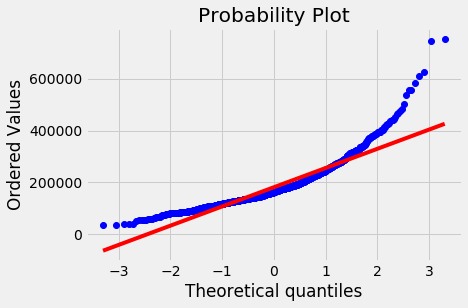

In [57]:
from scipy import stats
from scipy.stats import norm, skew
fig = plt.figure()
res = stats.probplot(df['SalePrice'], plot=plt)
plt.show()

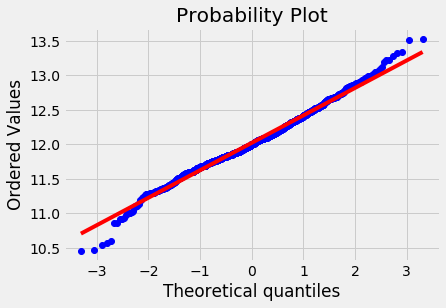

In [58]:
x=df
x['SalePrice']=np.log1p(x['SalePrice'])
fig = plt.figure()
res = stats.probplot(x['SalePrice'], plot=plt)
plt.show()

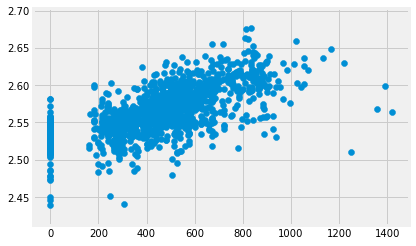

In [59]:
%matplotlib inline
target=np.log1p(df["SalePrice"])
plt.figure(4);
plt.scatter(x=df['GarageArea'],y=target)

As we can see that some houses have zero garage area indicates that they did not have garage. there are also some outliers which affects our regression model so we remove that outliers from our data. 

(-200, 1600)

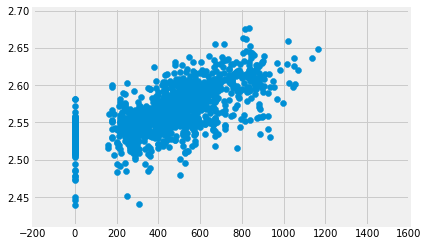

In [60]:
df=df[df['GarageArea']<1200]
target=np.log1p(df["SalePrice"])
plt.figure(9);
plt.scatter(x=df['GarageArea'],y=target)
plt.xlim(-200,1600)

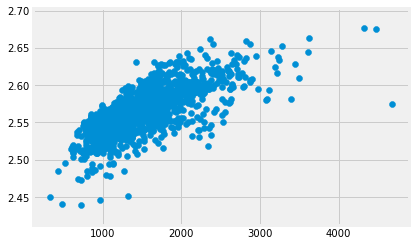

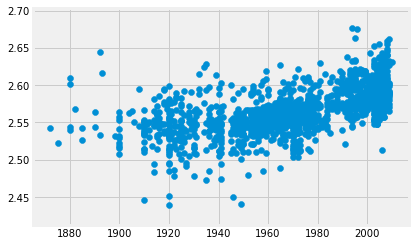

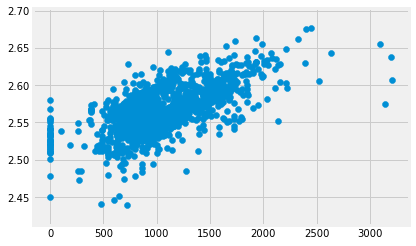

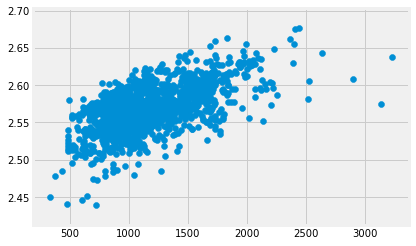

In [61]:
target=np.log1p(df["SalePrice"])
plt.figure(5);
plt.scatter(x=df['GrLivArea'],y=target)
plt.figure(6);
plt.scatter(x=df['YearBuilt'],y=target)
plt.figure(7);
plt.scatter(x=df['TotalBsmtSF'],y=target)
plt.figure(8);
plt.scatter(x=df['1stFlrSF'],y=target)


**Handling Missing Values**

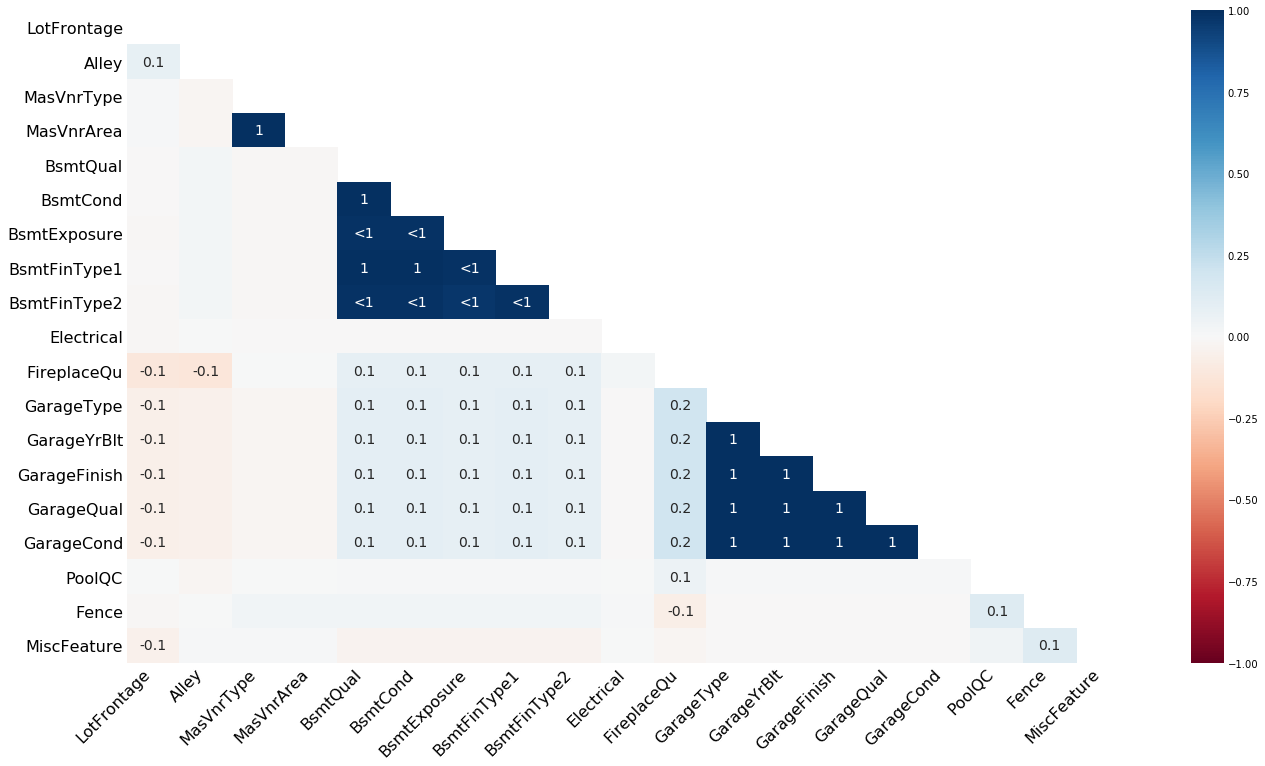

In [62]:
import missingno as msno
msno.heatmap(df)

In [63]:
total=df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1449,0.995876
MiscFeature,1402,0.963574
Alley,1364,0.937457
Fence,1174,0.806873
FireplaceQu,689,0.473540
LotFrontage,258,0.177320
GarageQual,81,0.055670
GarageCond,81,0.055670
GarageFinish,81,0.055670
GarageType,81,0.055670


We'll consider that when more than 20% of the data is missing, we should delete the corresponding variable and pretend it never existed. This means that we will not try any trick to fill the missing data in these cases.

In [64]:
df.shape

(1455, 82)

**Merging the training and testing dataset**

In [65]:
data=pd.concat((df.loc[:,'MSSubClass':'SaleCondition'],
                dt.loc[:,'MSSubClass':'SaleCondition']))

### Missing data
Important questions when thinking about missing data:

* How prevalent is the missing data?
* Is missing data random or does it have a pattern? 
>  The answer to these questions is important for practical reasons because missing data can imply a reduction of the sample size. This can prevent us from proceeding with the analysis. Moreover, from a substantive perspective, we need to ensure that the missing data process is not biased and hidding an inconvenient truth.

In [66]:
var1=['Exterior1st','Exterior2nd','SaleType','Electrical','KitchenQual']
for v in var1:
  data[v]=data[v].fillna(data[v].mode()[0])
data['MSZoning'] = data.groupby('MSSubClass')['MSZoning'].transform(lambda x: x.fillna(x.mode()[0]))

for col in ['GarageType','GarageFinish','GarageQual','GarageCond','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',"PoolQC",'Alley','Fence','MiscFeature','FireplaceQu','MasVnrType','Utilities']:
  data[col]=data[col].fillna('None')

for col in ['GarageYrBlt','GarageArea','GarageCars','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BsmtUnfSF','TotalBsmtSF']:
  data[col]=data[col].fillna(0)

data['LotFrontage'] = data.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

data['Functional']=data['Functional'].fillna('Typ')

data=pd.get_dummies(data)
data.shape

(2914, 302)

* Both Exterior 1 & 2 have only one missing value. We will just substitute in the most common string and also the 'RL' is by far the most common value. So we can fill in missing values with 'RL'
* for all the catagorical variable mentioned above data description says NA means "No Pool","No Basement" etc.. majority of houses have no Pool at all in general.
* Replacing missing data with 0 (Since No garage = no cars in such garage)
* group by neighborhood and fill in missing value by the median LotFrontage of all the neighborhood
  In functional data description says NA means typical

In [67]:
print(data.isnull().sum().sum())
data.head(3)


0


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,0,0,0,1,0,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,0,0,0,1,0,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,0,0,0,1,0,0,0,0,1,0


there's no missing value and generating the dummy variables for categorical data we got the total 302 attributes or columns so we drop first to reduce the coumns and the complexcity of our model this descreases the running time.

**Data Visualization**

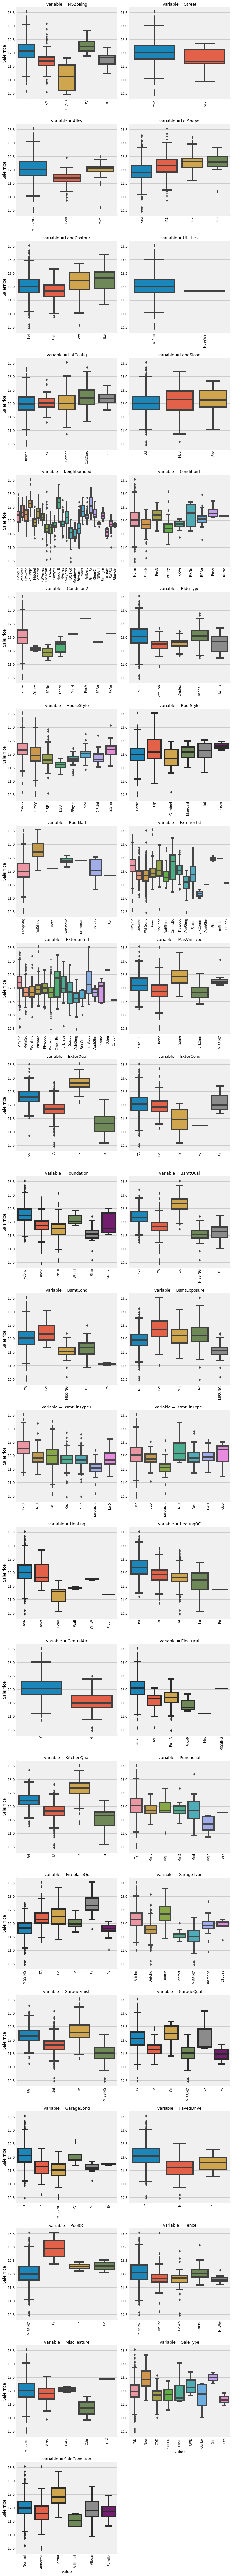

In [68]:
for c in df_cat:
    df[c] = df[c].astype('category')
    if df[c].isnull().any():
        df[c] = df[c].cat.add_categories(['MISSING'])
        df[c] = df[c].fillna('MISSING')

def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)
f = pd.melt(df, id_vars=['SalePrice'], value_vars=categorical_features)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False, size=5)
g = g.map(boxplot, "value", "SalePrice")

### Hypothesis Testing
> A statistical hypothesis, sometimes called confirmatory data analysis, is a hypothesis that is testable on the basis of observing a process that is modeled via a set of random variables. A statistical hypothesis test is a method of statistical inference

In [69]:
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
model = smf.ols('SalePrice ~ MSSubClass+LotArea+OverallQual+OverallCond+YearBuilt+YearRemodAdd+BsmtFinSF1+BsmtFinSF2+BsmtUnfSF+TotalBsmtSF+LowQualFinSF+GrLivArea+BsmtFullBath+BsmtHalfBath+FullBath+HalfBath+BedroomAbvGr+KitchenAbvGr+TotRmsAbvGrd+Fireplaces+GarageCars+GarageArea+WoodDeckSF+OpenPorchSF+EnclosedPorch+ScreenPorch+PoolArea+MiscVal+MoSold+YrSold', data=df_num).fit()
print(model.summary()) 

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     208.7
Date:                Wed, 22 Jul 2020   Prob (F-statistic):               0.00
Time:                        09:05:31   Log-Likelihood:                -17336.
No. Observations:                1460   AIC:                         3.473e+04
Df Residuals:                    1430   BIC:                         3.489e+04
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      4.827e+05   1.43e+06      0.339

### Feature Selection
1.Univariate Selection

2.Feature Importance

3.Corellation matrix using Heatmap

### Filter method
select the best subset
  
  -chi square
  
  -anova test

  -corellation coefficient(pearson [-1,1])

### wrapper meathod


**1.Forward Selection**: Forward selection is an iterative method in which we start with having no feature in the model. In each iteration, we keep adding the feature which best improves our model till an addition of a new variable does not improve the performance of the model.

**2.Backward Elimination:** In backward elimination, we start with all the features and removes the least significant feature at each iteration which improves the performance of the model. We repeat this until no improvement is observed on removal of features.

**3.Recursive Feature elimination:** It is a greedy optimization algorithm which aims to find the best performing feature subset. It repeatedly creates models and keeps aside the best or the worst performing feature at each iteration. It constructs the next model with the left features until all the features are exhausted. It then ranks the features based on the order of their elimination.


### Embedded techniques
tries all the permutation of different subsets



### Univariate Selection
Statistical tests can be used to select those features that have the strongest relationship with the output variable.


The scikit-learn library provides the SelectKBest class that can be used with a suite of different statistical tests to select a specific number of features.


The example below uses the chi-squared (chi²) statistical test for non-negative features to select 10 of the best features from the Mobile Price Range Prediction Dataset.





### Correlation values

In [70]:
corr=df.corr()["SalePrice"]
corr[np.argsort(corr, axis=0)[::-1]]

SalePrice        1.000000
OverallQual      0.819117
GrLivArea        0.716058
GarageCars       0.685201
GarageArea       0.668203
TotalBsmtSF      0.641751
1stFlrSF         0.614069
FullBath         0.594465
YearBuilt        0.585547
YearRemodAdd     0.564193
GarageYrBlt      0.542240
TotRmsAbvGrd     0.537093
Fireplaces       0.491352
MasVnrArea       0.429868
BsmtFinSF1       0.388967
LotFrontage      0.374036
WoodDeckSF       0.334872
OpenPorchSF      0.323000
2ndFlrSF         0.321592
HalfBath         0.314807
LotArea          0.261688
BsmtFullBath     0.236167
BsmtUnfSF        0.222569
BedroomAbvGr     0.209945
ScreenPorch      0.121822
PoolArea         0.074609
MoSold           0.057999
3SsnPorch        0.055168
BsmtFinSF2       0.005097
BsmtHalfBath    -0.004957
Id              -0.017036
MiscVal         -0.018611
OverallCond     -0.037699
LowQualFinSF    -0.037974
YrSold          -0.038043
MSSubClass      -0.073423
KitchenAbvGr    -0.147822
EnclosedPorch   -0.149223
Name: SalePr

## Model Training and Testing

### **PredictionError plot**
The Prediction Error Visualizer visualizes prediction errors as a scatterplot of the predicted and actual values. We can then visualize the line of best fit and compare it to the 45º line.

### **Residual plot**
A residual is a difference between the target and predicted values, i.e. the error of the prediction. The ResidualsPlot Visualizer shows the difference between residuals on the vertical axis and the dependent variable on the horizontal axis

In [71]:
#creating matrices for sklearn:
X = data[:df.shape[0]]
y = df.SalePrice
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

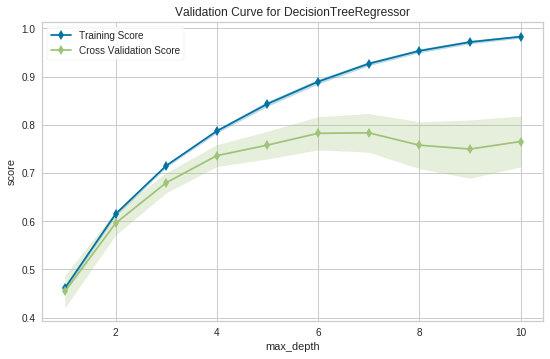

In [72]:
import numpy as np


from yellowbrick.model_selection import ValidationCurve

from sklearn.tree import DecisionTreeRegressor

# Load a regression dataset

viz = ValidationCurve(
    DecisionTreeRegressor(), param_name="max_depth",
    param_range=np.arange(1, 11), cv=10, scoring="r2"
)

# Fit and show the visualizer
viz.fit(X, y)
viz.show()

## XGBoost 
XGBoost is a decision-tree-based ensemble Machine Learning algorithm that uses a gradient boosting framework. In prediction problems involving unstructured data (images, text, etc.) artificial neural networks tend to outperform all other algorithms or frameworks. Can be used to solve regression, classification, ranking, and user-defined prediction problems.

In [73]:
import xgboost as xgb
# model_xgb = xgb.XGBRegressor(n_estimators=360, max_depth=2, learning_rate=0.1) 
model_xgb = xgb.XGBRegressor(n_estimators=2000, max_depth=6, learning_rate=0.1, 
                             verbosity=1, silent=None, objective='reg:linear', booster='gbtree', 
                             n_jobs=-1, nthread=None, gamma=0, min_child_weight=1, max_delta_step=0, 
                             subsample=0.8, colsample_bytree=0.8, colsample_bylevel=1, colsample_bynode=1, reg_alpha=0.2, reg_lambda=1.2, 
                             scale_pos_weight=1, base_score=0.5, random_state=0, seed=None, missing=None, importance_type='gain') 


In [74]:
model_xgb.fit(X_train, y_train)

[09:05:35] WARNING: /workspace/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.1, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=2000, n_jobs=-1, nthread=-1, num_parallel_tree=1,
             objective='reg:linear', random_state=0, reg_alpha=0.2,
             reg_lambda=1.2, scale_pos_weight=1, seed=0, silent=None,
             subsample=0.8, tree_method=None, validate_parameters=False,
             verbosity=1)

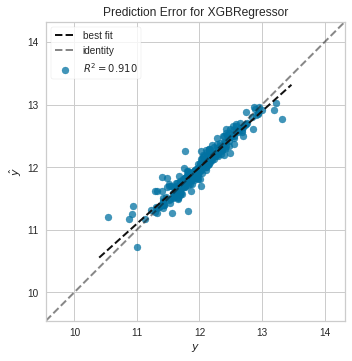

In [75]:
from yellowbrick.regressor import PredictionError
visualizer = PredictionError(model_xgb)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

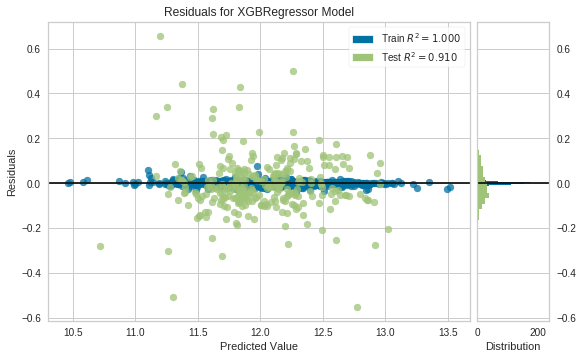

In [76]:
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(model_xgb)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

## RandomForest

> Random Forest is a flexible, easy to use machine learning algorithm that produces great results most of the time with minimum time spent on hyper-parameter tuning. It has gained popularity due to its simplicity and the fact that it can be used for both classification and regression tasks.

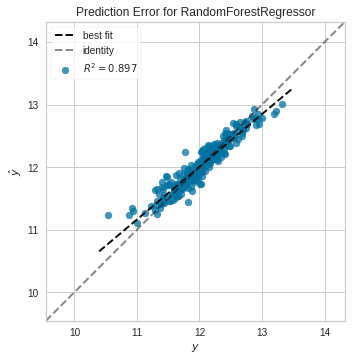

In [77]:
from sklearn.ensemble import RandomForestRegressor
from yellowbrick.regressor import PredictionError
rdf_r=RandomForestRegressor(n_estimators=600,random_state=0, n_jobs= -1)
visualizer = PredictionError(rdf_r)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

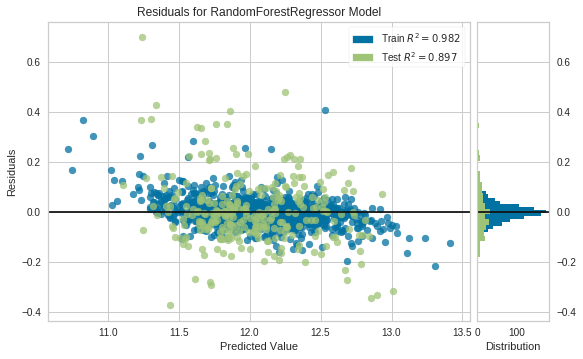

In [78]:
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(rdf_r)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

In [79]:
#import scikitplot as skplt
#skplt.estimators.plot_learning_curve(rdf_r, X, y)
#plt.show()

## Ridge

> Ridge regression is a way to create a parsimonious model when the number of predictor variables in a set exceeds the number of observations, or when a data set has multicollinearity (correlations between predictor variables).

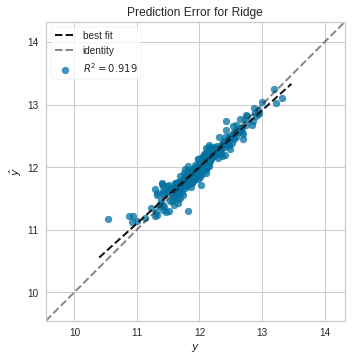

In [80]:
from sklearn.linear_model import Ridge
from yellowbrick.regressor import PredictionError
model_rdg=Ridge(alpha=3.181)
visualizer = PredictionError(model_rdg)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

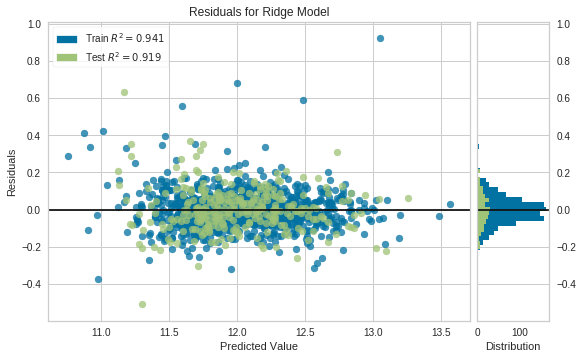

In [81]:
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(model_rdg)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

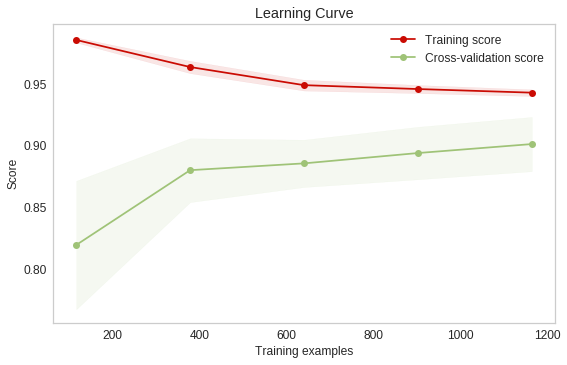

In [82]:
import scikitplot as skplt
skplt.estimators.plot_learning_curve(model_rdg, X, y)
plt.show()

## DecisionTree

> Decision Tree - Regression. Decision tree builds regression or classification models in the form of a tree structure. It breaks down a dataset into smaller and smaller subsets while at the same time an associated decision tree is incrementally developed. The final result is a tree with decision nodes and leaf nodes

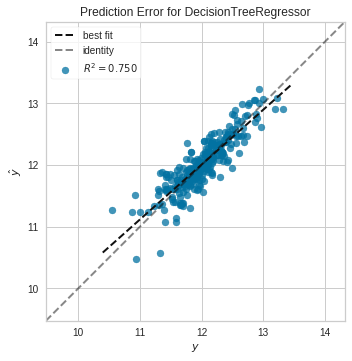

In [83]:
from yellowbrick.regressor import PredictionError
from sklearn.tree import DecisionTreeRegressor
dtree = DecisionTreeRegressor(random_state=0)
visualizer = PredictionError(dtree)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

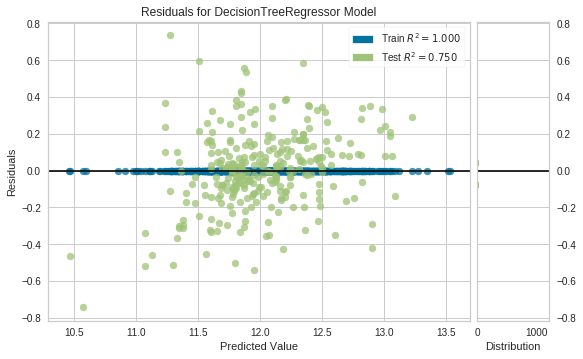

In [84]:
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(dtree)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

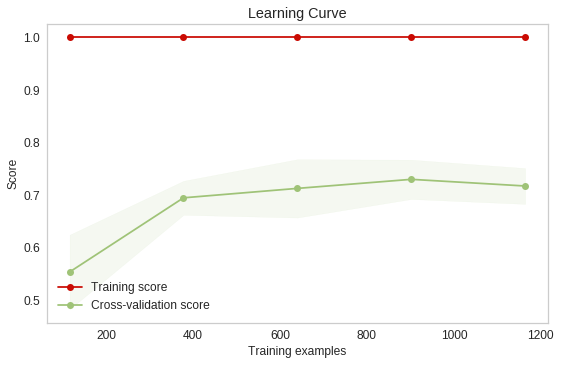

In [85]:
import scikitplot as skplt
skplt.estimators.plot_learning_curve(dtree, X, y)
plt.show()

## Lasso

> Lasso regression is a type of linear regression that uses shrinkage. Shrinkage is where data values are shrunk towards a central point, like the mean. The lasso procedure encourages simple, sparse models (i.e. models with fewer parameters).

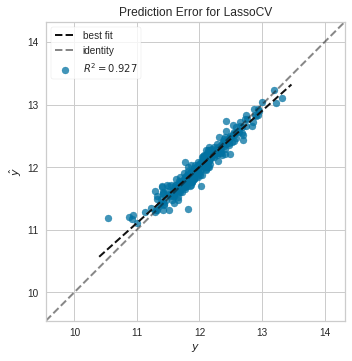

In [86]:
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
model_lasso = LassoCV(alphas = [1, 0.1, 0.001, 0.0005]).fit(X_train, y_train)
from yellowbrick.regressor import PredictionError
visualizer = PredictionError(model_lasso)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

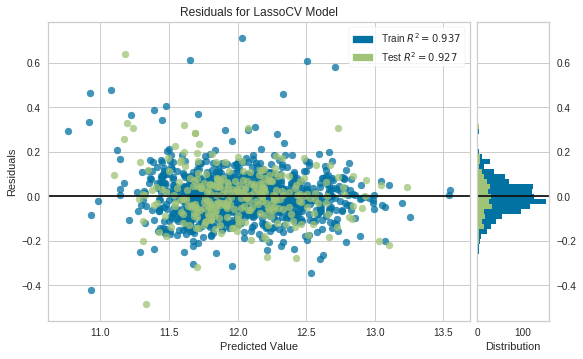

In [87]:
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(model_lasso)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

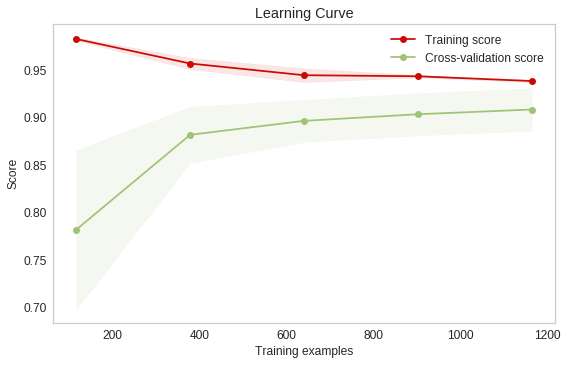

In [88]:
import scikitplot as skplt
skplt.estimators.plot_learning_curve(model_lasso, X, y)
plt.show()

## Model Performance Plot

XGBoost : 0.9847602030337149
RandomForestRegressor : 0.9684444042449365
Lasso : 0.9305237612818494
DecisionTree : 0.9676368450728433
Ridge : 0.9416817611041214


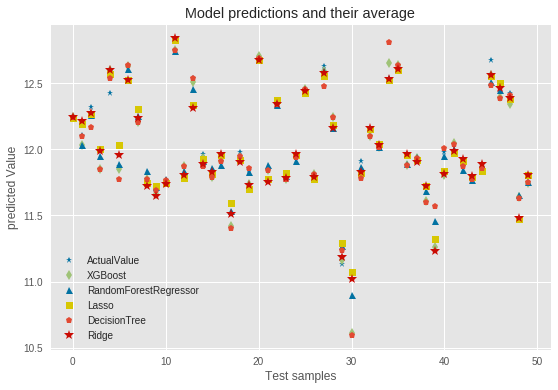

In [89]:
X_test = X[:50]
y_test = y[:50]
pred1 = model_xgb.predict(X_test)
pred2 = rdf_r.predict(X_test)
pred3 = model_lasso.predict(X_test)
pred4 = dtree.predict(X_test)
pred5=model_rdg.predict(X_test)
plt.style.use('ggplot')
plt.figure(figsize=(8,6))
plt.plot(y_test, 'b*', label='ActualValue' )
plt.plot(pred1, 'gd', label='XGBoost')
plt.plot(pred2, 'b^', label='RandomForestRegressor')
plt.plot(pred3, 'ys', label='Lasso')
plt.plot(pred4, 'p', label='DecisionTree')
plt.plot(pred5, 'r*', ms=10, label='Ridge')

print('XGBoost :',model_xgb.score(X_test, y_test))
print('RandomForestRegressor :',rdf_r.score(X_test, y_test))
print('Lasso :',model_lasso.score(X_test, y_test))
print('DecisionTree :',dtree.score(X_test, y_test))
print('Ridge :',model_rdg.score(X_test, y_test))
# plt.tick_params(axis='x', which='both', bottom=False, top=False,
#                 labelbottom=False)
plt.tick_params(axis='x', which='both', bottom=True, top=True,
                labelbottom=True)
plt.ylabel('predicted Value')
plt.xlabel('Test samples')
plt.legend(loc="best")
plt.title('Model predictions and their average')
plt.show()

**For the visual comparison of models performance, total 50 random test samples are selected from the test dataset, after scaling the test values the house prices are predicted using the trained model. In fig above the predicted price values of each model are plotted with actual price to show the performance of each model.** 